# TEST DLKT

Author: Paweł Piórkowski

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

import cv2
import os
import pandas as pd

2024-02-29 11:08:03.305294: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:

##loading csvs

file = "signs_labels.csv"

df = pd.read_csv(file, sep=",")

classes = df.values[:, 0]
classes_names = df.values[:, 1]
print("Labels:", classes)
print("Labels name:", classes_names)
classes_names[4]



Labels: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Labels name: ['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' '

'Speed limit (70km/h)'

In [3]:
## loading images
from skimage import io
from skimage import img_as_ubyte

def load_img(indir, class_to_keep):
    samples = []
    labels = []
    #print(os.listdir(indir))
    for class_dir in os.listdir(indir):
        the_class = int(class_dir)
        if the_class in class_to_keep:
            print(class_dir)
            for file in os.listdir(indir+'/'+class_dir):
                if "{}/{}/{}".format(indir,class_dir,file).endswith('.ppm'):
                    image = io.imread("{}/{}/{}".format(indir,class_dir,file))
                    try:
                        image = img_as_ubyte(image)
                        image = cv2.resize(image, (64,64))
                        samples.append(image)
                        labels.append(the_class)
                    except Exception as e:
                        print(str(e))
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels


samples, labels = load_img('signs', classes)
print('loaded',len(samples),' samples')

print('classes',set(labels))

# normalization
samples = samples / 255.0



00012
00032
00027
00041
00034
00007
00005
00030
00002
00035
00038
00026
00000
00001
00029
00010
00009
00039
00004
00031
00022
00028
00021
00014
00040
00015
00042
00037
00008
00003
00017
00024
00023
00033
00018
00013
00016
00025
00006
00011
00019
00020
00036
loaded 26640  samples
classes {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


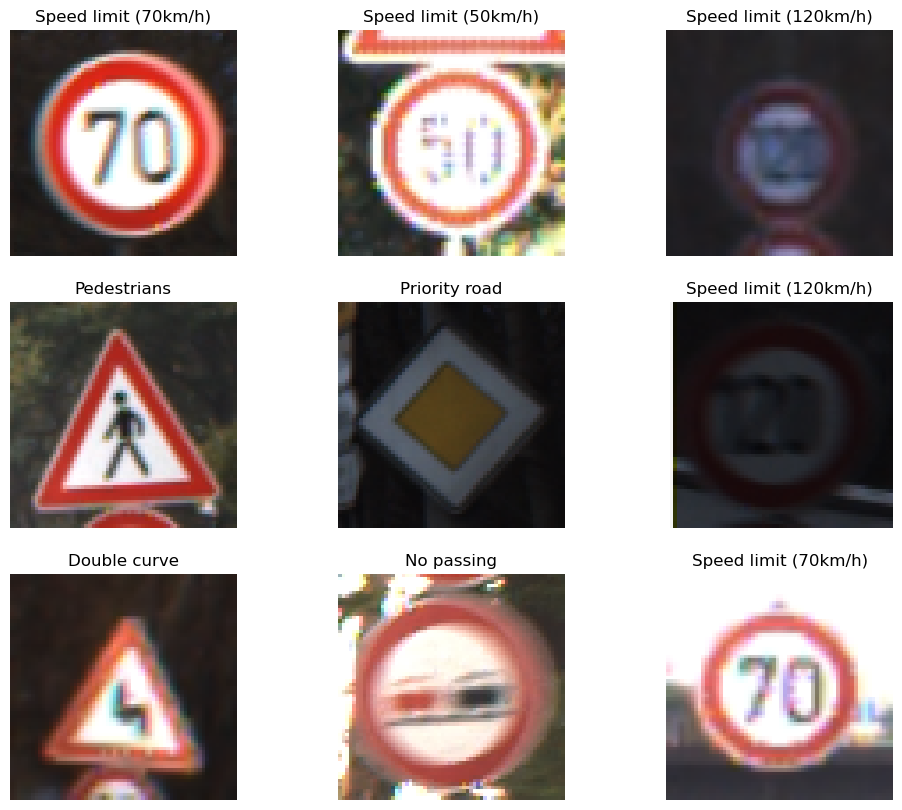

In [4]:
## showing the loaded samples:

import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(classes_names[labels[n]])
    plt.axis("off")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

## Creating a Model

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
print("10%")
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
print("20%")
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
print("40%")
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Dropout(0.25))
print("60%")
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
print("70%")
model.add(Activation("sigmoid"))
model.add(Dense(43))
model.add(Activation("softmax"))
print("90%")
model.summary()
print("100%")

2024-02-29 11:08:21.400185: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-02-29 11:08:21.409412: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-02-29 11:08:22.589357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-29 11:08:22.589635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.5GHz coreCount: 16 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2024-02-29 11:08:22.589881: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-02-29 11:08:22.610245: I tensorflow/stream_executor/pl

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encode labesls to one-hot labels

encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (26640, 43)


In [ ]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,train_size=0.80,random_state=42)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#spliting the set and compiling the model

(26640, 64, 64, 3)


: 

In [ ]:
#Training the model

H = model.fit(trainSamples, trainLabels, epochs=20, batch_size=10, validation_data=(testSamples,testLabels))

print("Done")